# Perfect sampling on 1d XY model 

## Hamiltonian
\begin{align}
H = -\sum_{<ij>}J_{ij}S_{i}\cdot S_{j} = -J\sum_{i=1}^{N-1}\cos{(\theta_{i}-\theta_{i+1})}，
\end{align}
where $N$ is the number of spins and we assume $J_{ij} = J$.

## 1. Free bounday condition

### Partition function：
\begin{align}
Z = (2\pi)^{N}[I_{0}(\beta J)]^{N-1}
\end{align}

### $Z_{1}$:
\begin{align}
Z_{1}(\theta_{1}) &= \int_{-\pi}^{\pi}d\theta_{2}\cdots d\theta_{N}\exp{[\beta J(\cos{(\theta_{1} - \theta_{2})} + \cos{(\theta_{2} - \theta_{3})} + \cdots + \cos{(\theta_{N-1} - \theta_{N})})]}\\
&=(2\pi)^{N-2}[I_{0}(\beta J)]^{N-2}\int_{-\pi}^{\pi}d\theta_{2}\exp{[\beta J\cos{(\theta_{1}-\theta_{2}})]}, 
\end{align}
then we get
\begin{align}
P(\theta_{1}) &= \frac{Z_{1}(\theta_{1})}{Z} = \frac{\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{1}-\theta})]}}{(2\pi)^{2} I_{0}(\beta J)}\\
&=\frac{1}{2\pi}.
\end{align}

### $Z_{2}(\theta_{1}, \theta_{2})$:
\begin{align*}
Z_{2}(\theta_{1}, \theta_{2}) &= \int_{-\pi}^{\pi}d\theta_{3}\cdots d\theta_{N}\exp{[\beta J(\cos{(\theta_{1} - \theta_{2})} + \cos{(\theta_{2} - \theta_{3})} + \cdots + \cos{(\theta_{N-1} - \theta_{N})})]} \\
&=\exp{[\beta J\cos{(\theta_{1}-\theta_{2})}]}(2\pi)^{N-3}[I_{0}(\beta J)]^{N-3}\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{2}-\theta})]},
\end{align*}
then we get
\begin{align}
P(\theta_{2}|\theta_{1}) &= \frac{Z_{2}(\theta_{1}, \theta_{2})}{Z_{1}(\theta_{1})}\\
&=\frac{\exp{[\beta J\cos{(\theta_{1}-\theta_{2})}]}\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{2}-\theta})]}}{2\pi I_{0}(\beta J)\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{1}-\theta})]}} \\
&=\frac{\exp{[\beta J\cos{(\theta_{1}-\theta_{2})}]}}{2\pi I_{0}(\beta J)}
\end{align}

### $Z_{k}(\theta_{1}, \cdots, \theta_{k})$
we can get general result by mathematical induction
\begin{align*}
Z_{k}(\theta_{1}, \cdots, \theta_{k}) &= \int_{-\pi}^{\pi}d\theta_{k+1}\cdots d\theta_{N}\exp{[\beta J(\cos{(\theta_{1} - \theta_{2})} + \cos{(\theta_{2} - \theta_{3})} + \cdots + \cos{(\theta_{N-1} - \theta_{N})})]} \\
&= \Pi_{i=1}^{k-1}\exp{[\beta J\cos{(\theta_{i}-\theta_{i+1})}]}(2\pi)^{N-(k+1)}[I_{0}(-J\beta)]^{N-(k+1)}\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{k}-\theta})]},
\end{align*}
so we have
\begin{align*}
P(\theta_{k}|\theta_{k-1},\cdots,\theta_{1}) &= \frac{\exp{[\beta J\cos{(\theta_{k-1}-\theta_{k})}]}\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{k}-\theta})]}}{2\pi I_{0}(\beta J)\int_{-\pi}^{\pi}d\theta\exp{[\beta J\cos{(\theta_{k-1}-\theta})]}} \\
&=\frac{\exp{[\beta J\cos{(\theta_{k-1}-\theta_{k})}]}}{2\pi I_{0}(\beta J)}
\end{align*}

### So the perfect sampling of the 1D XY model (free boundary condition) is as follows,
#### 1. Sample $\theta_{1}$ from 
\begin{align}
P(\theta_{1}) = \frac{1}{2\pi},
\end{align}

#### 2. Sample $\theta_{k}$ from the following distribution recursively:
\begin{align}
P(\theta_{k}|\theta_{k-1}, \cdots, \theta_{1}) = \frac{\exp{[\beta J\cos{(\theta_{k-1}-\theta_{k})}]}}{2\pi I_{0}(\beta J)}.
\end{align}

----

### Chain Sampling of 1D XY Model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange
import time

In [4]:
from math import cos, exp, pi
from scipy.integrate import quad

In [5]:
from scipy.special import iv
from scipy.integrate import quad

In [86]:
class XY_1d_chain_sampling:
    
    def __init__(self, j=1, beta=1, length=10):
        self.j = j
        self.beta = beta
        self.length = length
        self.grids = np.zeros(length)
        self.I0_beta = iv(0, self.beta * self.j)
        
    def I_beta_estimator(self, theta):
        I_theta_k = lambda x: exp(self.j * self.beta * cos(theta - x))
        return I_theta_k
    
    def pdf_theta_1(self, theta):
        z = ((2*pi)**2) * self.I0_beta
        I_theta_k = lambda x: exp(self.j * self.beta * cos(theta - x))
        z_theta = quad(I_theta_k, -pi, pi)
        return z_theta[0] / z
    
    def pdf_theta_ij(self, theta_i, theta_j):
        zz_ij = lambda x: exp(self.j * self.beta * (cos(theta_i - x) + cos(theta_i - theta_j)))
        z_ij = quad(zz_ij, -pi, pi)
        zz_j = lambda x: 2 * pi * self.I0_beta * exp(self.j * self.beta * cos(theta_j - x))
        z_j = quad(zz_j, -pi, pi)
        return z_ij[0] / z_j[0]
        
    def sample_theta_i(self, theta_j):
        f_theta = np.random.uniform(0, 1)
        pdf_theta_i = lambda theta_i: self.pdf_theta_ij(theta_i, theta_j)
        cdf_theta_i = lambda theta: quad(pdf_theta_i, -pi, theta)
        theta_sample = self.shooting(f_theta, cdf_theta_i)
        
        return theta_sample
    
    def shooting(self, f_tg, cdf, err_thold=1e-10):
        theta_left, theta_right = -pi, pi
        while True: 
            theta_mid = (theta_left + theta_right) / 2.0
            if cdf(theta_mid)[0] < f_tg - err_thold:
                theta_left = theta_mid
            elif cdf(theta_mid)[0] > f_tg + err_thold:
                theta_right = theta_mid
            else:
                return theta_mid
        
    def sample_theta(self):
        f_theta = np.random.uniform(0, 1)
        cdf_theta = lambda theta: quad(self.pdf_theta_1, -pi, theta)
        theta_sample = self.shooting(f_theta, cdf_theta)
        
        return theta_sample
    
    def sample_chain(self):
        self.grids[0] = self.sample_theta()
        for i in range(self.length-1):
            self.grids[i] = self.sample_theta_i(self.grids[i-1])
        print("sampling is done!")
        
    def spin_viz(self, figsize=(12, 3), save=False, folder_name=None):
        fig = plt.figure(figsize=figsize)
        x, y = np.meshgrid(np.arange(0, self.length), 0)
        u = np.cos(self.grids)
        v = np.sin(self.grids)
        q = plt.quiver(x, y, u, v, scale=20, width=0.01, headlength=3, headwidth=2, headaxislength=3, minshaft=3)
        plt.axis('off')
        plt.title('T={:.3f}, spins={}'.format(1/self.beta, self.length), fontsize=20)
        if save and step is not None:
            plt.savefig(f'./{folder_name}/config_plot_step_{step}.pdf', dpi=100)
            plt.close(fig)
            
    def energy_compute_grids(self):
        energy_total = 0
        for i in range(self.length-1):
            energy_i = -self.j * np.cos(self.grids[i] - self.grids[i+1])
            energy_total += energy_i
        return energy_total

In [87]:
xy_1d = XY_1d_chain_sampling(beta=20, j=1, length=20)

In [88]:
theta_j = xy_1d.sample_theta()

In [89]:
xy_1d.sample_chain()

sampling is done!


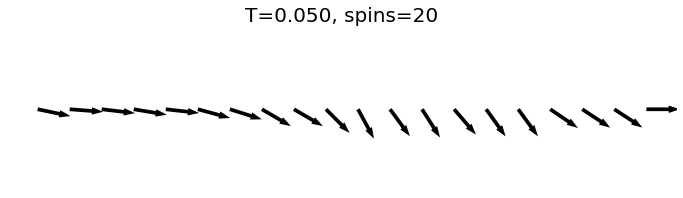

In [90]:
xy_1d.spin_viz()

In [11]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -18.183.


### low temperature limit (size = 20)

In [25]:
xy_1d = XY_1d_chain_sampling(beta=100, j=1, length=20)

In [26]:
xy_1d.sample_chain()

sampling is done!


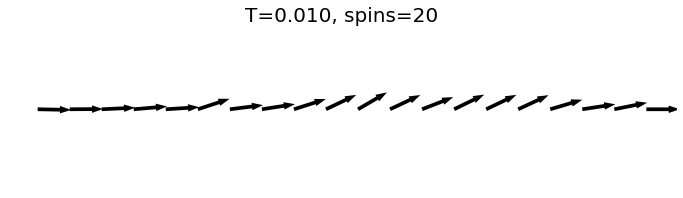

In [27]:
xy_1d.spin_viz()

In [28]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -18.871.


### low temperature limit (size = 10)

In [29]:
xy_1d = XY_1d_chain_sampling(beta=100, j=1, length=10)

In [30]:
xy_1d.sample_chain()

sampling is done!


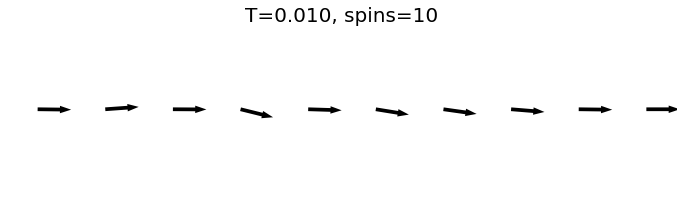

In [31]:
xy_1d.spin_viz()

In [32]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -8.931.


### low temperature limit (size = 5)

In [33]:
xy_1d = XY_1d_chain_sampling(beta=100, j=1, length=5)

In [34]:
xy_1d.sample_chain()

sampling is done!


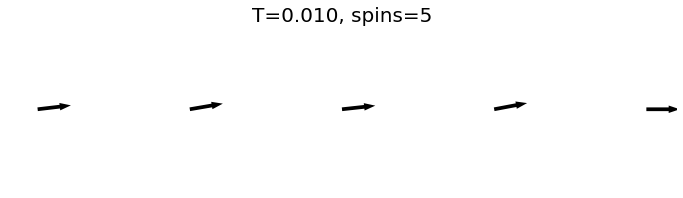

In [35]:
xy_1d.spin_viz()

In [36]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -3.977.


### Beta = 200

In [41]:
# initialize the 1d xy model
xy_1d = XY_1d_chain_sampling(beta=200, j=1, length=10)

In [42]:
time_start = time.time()
xy_1d.sample_chain()
time_end = time.time()
print('it costs us: {time_end - time_start}.')

sampling is done!


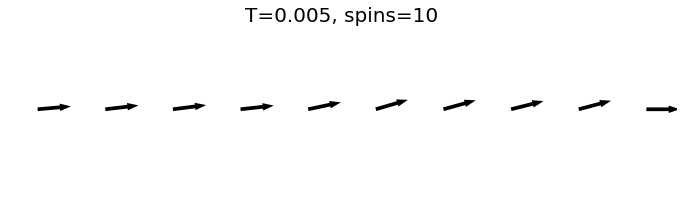

In [43]:
xy_1d.spin_viz()

In [44]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -8.958.


In [53]:
# initialize the 1d xy model
xy_1d = XY_1d_chain_sampling(beta=350, j=1, length=10)

In [55]:
time_start = time.time()
xy_1d.sample_chain()
time_end = time.time()
print(f'it costs us: {time_end - time_start}.')

sampling is done!
it costs us: 108.03134369850159.


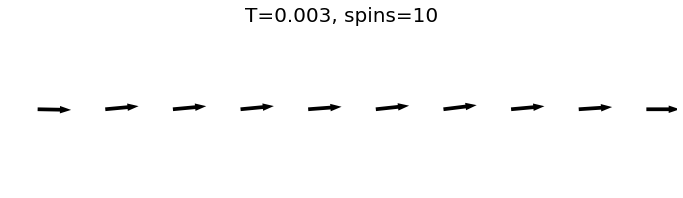

In [56]:
xy_1d.spin_viz()

In [57]:
print(f"The energy of the system is: {xy_1d.energy_compute_grids():.3f}.")

The energy of the system is: -8.990.


In [6]:
def i_beta_theta_creat(beta, j, theta_1):
    i_beta_theta = lambda theta: exp(beta * j * cos(theta_1 - theta))
    return i_beta_theta

In [71]:
beta, j, theta = 100, 1, 0
i_beta_theta = i_beta_theta_creat(beta, j, theta)

In [67]:
error = quad(i_beta_theta, -pi, pi)[0] - 2 * pi * iv(0, beta*j)

In [72]:
quad(i_beta_theta, -pi, pi)

(6.74658094980498e+42, 2.1057675116201857e+31)

In [73]:
2 * pi * iv(0, beta*j)

6.74658094980496e+42